  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  755M    0 48927    0     0  48927      0  4:29:45  0:00:01  4:29:44 33306
  0  755M    0  700k    0     0   350k      0  0:36:47  0:00:02  0:36:45  289k
  0  755M    0 5758k    0     0  1919k      0  0:06:42  0:00:03  0:06:39 1698k
  2  755M    2 19.6M    0     0  5027k      0  0:02:33  0:00:04  0:02:29 4564k
  4  755M    4 33.5M    0     0  6879k      0  0:01:52  0:00:05  0:01:47 6988k
  6  755M    6 47.7M    0     0  8149k      0  0:01:34  0:00:06  0:01:28 9862k
  8  755M    8 61.8M    0     0  9042k      0  0:01:25  0:00:07  0:01:18 12.1M
 10  755M   10 75.7M    0     0  9697k      0  0:01:19  0:00:08  0:01:11 13.8M
 11  755M   11 89.9M    0     0   9.9M      0  0:01

In [45]:
import os

input_dir = "D:\\FoodSeg103\\FoodSeg103\\Images\\img_dir\\train"
target_dir = "D:\\FoodSeg103\\FoodSeg103\\Images\\ann_dir\\train_mask=1\\train_mask=1"

img_size = (160, 160)
num_classes = 4
batch_size = 32

input_img_paths = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".jpg")
    ]
)
target_img_paths = sorted(
    [
        os.path.join(target_dir, fname)
        for fname in os.listdir(target_dir)
        if fname.endswith(".png") and not fname.startswith(".")
    ]
)

print("Number of samples:", len(input_img_paths))

for input_path, target_path in zip(input_img_paths[:10], target_img_paths[:10]):
    print(input_path, "|", target_path)

Number of samples: 4983
D:\FoodSeg103\FoodSeg103\Images\img_dir\train\00000000.jpg | D:\FoodSeg103\FoodSeg103\Images\ann_dir\train_mask=1\train_mask=1\00000000.png
D:\FoodSeg103\FoodSeg103\Images\img_dir\train\00000001.jpg | D:\FoodSeg103\FoodSeg103\Images\ann_dir\train_mask=1\train_mask=1\00000001.png
D:\FoodSeg103\FoodSeg103\Images\img_dir\train\00000002.jpg | D:\FoodSeg103\FoodSeg103\Images\ann_dir\train_mask=1\train_mask=1\00000002.png
D:\FoodSeg103\FoodSeg103\Images\img_dir\train\00000003.jpg | D:\FoodSeg103\FoodSeg103\Images\ann_dir\train_mask=1\train_mask=1\00000003.png
D:\FoodSeg103\FoodSeg103\Images\img_dir\train\00000004.jpg | D:\FoodSeg103\FoodSeg103\Images\ann_dir\train_mask=1\train_mask=1\00000004.png
D:\FoodSeg103\FoodSeg103\Images\img_dir\train\00000005.jpg | D:\FoodSeg103\FoodSeg103\Images\ann_dir\train_mask=1\train_mask=1\00000005.png
D:\FoodSeg103\FoodSeg103\Images\img_dir\train\00000006.jpg | D:\FoodSeg103\FoodSeg103\Images\ann_dir\train_mask=1\train_mask=1\00000006.

In [7]:
from PIL import Image
def image_to_convert_1(url):
    image_url = url
    test_image = Image.open(image_url)
    new_img = test_image.convert('1')
    new_img.save(url)

In [8]:
train_dir = r'D:\FoodSeg103\FoodSeg103\Images\ann_dir\train_mask=1'

In [10]:
# 測試: 把圖片位深轉換成1
image = Image.open("D:\\FoodSeg103\\FoodSeg103\\Images\\ann_dir\\train_mask=1\\00000000.png")
image_1 = image.convert('1')
image_1.save("D:\\FoodSeg103\\FoodSeg103\\Images\\ann_dir\\train_mask=1\\00000000.png")
display(image)
display(image_1)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\FoodSeg103\\FoodSeg103\\Images\\ann_dir\\train_mask=1\\00000000.png'

In [11]:
for image in os.listdir(train_dir):
    image_to_convert_1(os.path.join(train_dir +"\\"+image) ) 

PermissionError: [Errno 13] Permission denied: 'D:\\FoodSeg103\\FoodSeg103\\Images\\ann_dir\\train_mask=1\\train_mask=1'

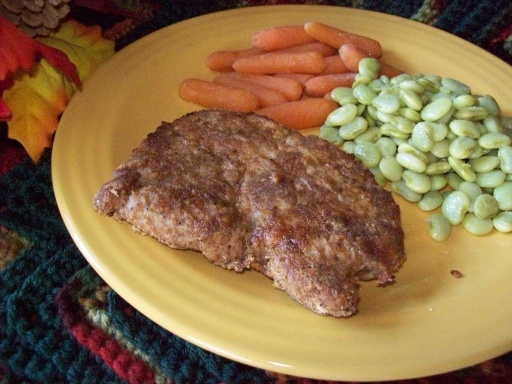

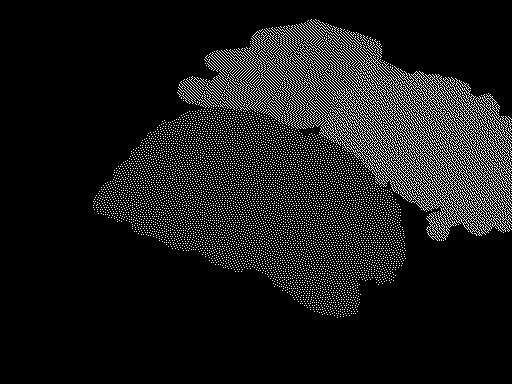

In [47]:
from IPython.display import Image, display
from tensorflow.keras.preprocessing.image import load_img
import PIL
from PIL import ImageOps

# Display input image #7
display(Image(filename=input_img_paths[9]))

# Display auto-contrast version of corresponding target (per-pixel categories)
img = PIL.ImageOps.autocontrast(load_img(target_img_paths[9]))
display(img)

In [48]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import load_img


class OxfordPets(keras.utils.Sequence):
    """Helper to iterate over the data (as Numpy arrays)."""

    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        self.target_img_paths = target_img_paths

    def __len__(self):
        return len(self.target_img_paths) // self.batch_size

    def __getitem__(self, idx):
        """Returns tuple (input, target) correspond to batch #idx."""
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i : i + self.batch_size]
        batch_target_img_paths = self.target_img_paths[i : i + self.batch_size]
        x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype="float32")
        for j, path in enumerate(batch_input_img_paths):
            img = load_img(path, target_size=self.img_size)
            x[j] = img
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
        for j, path in enumerate(batch_target_img_paths):
            img = load_img(path, target_size=self.img_size, color_mode="grayscale")
            y[j] = np.expand_dims(img, 2)
            # Ground truth labels are 1, 2, 3. Subtract one to make them 0, 1, 2:
            y[j] -= 1
        return x, y

In [108]:
from tensorflow.keras import layers


def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (3,))

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###

    for filters in [256, 128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer

#     x = layers.Activation("sigmoid")(x)
    x = layers.BatchNormalization()(x)
#     outputs = layers.Conv2D(3, kernel_size=1, strides=1, activation="sigmoid", padding="same")(x)
#     outputs = layers.Conv2D(num_classes, 2, activation="sigmoid", padding="same")(x)
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)
    # Define the model
    model = keras.Model(inputs, outputs)
    return model


# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()

# Build model
model = get_model(img_size, num_classes)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 80, 80, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 80, 80, 32)   128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 80, 80, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [51]:
import random

# Split our img paths into a training and a validation set
val_samples = 1000
random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_img_paths)
train_input_img_paths = input_img_paths[:-val_samples]
train_target_img_paths = target_img_paths[:-val_samples]
val_input_img_paths = input_img_paths[-val_samples:]
val_target_img_paths = target_img_paths[-val_samples:]

# Instantiate data Sequences for each split
train_gen = OxfordPets(
    batch_size, img_size, train_input_img_paths, train_target_img_paths
)
val_gen = OxfordPets(batch_size, img_size, val_input_img_paths, val_target_img_paths)

In [16]:
import tensorflow as tf
msg = tf.constant('Hello, TensorFlow!')
tf.print(msg)

Hello, TensorFlow!


In [63]:
ALPHA = 0.5
BETA = 0.5

def TverskyLoss(targets, inputs, alpha=ALPHA, beta=BETA, smooth=1e-6):
        
        #flatten label and prediction tensors
        inputs = K.flatten(inputs)
        targets = K.flatten(targets)
        
        #True Positives, False Positives & False Negatives
        TP = K.sum((inputs * targets))
        FP = K.sum(((1-targets) * inputs))
        FN = K.sum((targets * (1-inputs)))
       
        Tversky = (TP + smooth) / (TP + alpha*FP + beta*FN + smooth)  
        
        return 1 - Tversky



In [124]:
import keras.backend as K
def dice_coef(y_true, y_pred, smooth, thresh):
    y_pred = y_pred > thresh
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)

    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
def dice_loss(smooth, thresh):
  def dice(y_true, y_pred):
    return -dice_coef(y_true, y_pred, smooth, thresh)
  return dice

In [131]:
import keras.backend as K
def dice_coef_1(y_true, y_pred, smooth=1): 
    intersection = K.sum(y_true * y_pred, axis=[1,2,3]) 
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3]) 
    return K.mean( (2. * intersection + smooth) / (union + smooth), axis=0) 

def dice_coef_loss_1(y_true, y_pred): 
    1 - dice_coef_1(y_true, y_pred, smooth=1)

In [103]:
from keras import backend as K
'''
Compatible with tensorflow backend
'''
def focal_loss(gamma=2., alpha=.25):
    def focal_loss_fixed(y_true, y_pred):
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -K.sum(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1))-K.sum((1-alpha) * K.pow( pt_0, gamma) * K.log(1. - pt_0))
    return focal_loss_fixed



In [135]:

# Configure the model for training.
# We use the "sparse" version of categorical_crossentropy
# because our target data is integers.
# model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")
# "binary_crossentropy"
# model.compile(optimizer=tf.keras.optimizers.Adam(
#     learning_rate=10e-6), loss=[focal_loss(alpha=.25, gamma=2)])
model.compile(optimizer=tf.keras.optimizers.Adam(
     learning_rate=0.00001), 
        loss=[focal_loss(alpha=.25, gamma=2)],
        metrics=[dice_coef_1])

callbacks = [
    keras.callbacks.ModelCheckpoint("oxford_segmentation.h5", save_best_only=True)
]

# Train the model, doing validation at the end of each epoch.
epochs = 50
training = model.fit(train_gen, epochs=epochs, validation_data=val_gen, callbacks=callbacks)

Epoch 1/50
124/124 [==============================] - 105s 832ms/step - loss: 0.0000e+00 - dice_coef_1: 1.9922 - val_loss: 0.0000e+00 - val_dice_coef_1: 1.9922
Epoch 2/50
124/124 [==============================] - 101s 815ms/step - loss: 0.0000e+00 - dice_coef_1: 1.9922 - val_loss: 0.0000e+00 - val_dice_coef_1: 1.9922
Epoch 3/50
124/124 [==============================] - 102s 820ms/step - loss: 0.0000e+00 - dice_coef_1: 1.9922 - val_loss: 0.0000e+00 - val_dice_coef_1: 1.9922
Epoch 4/50
124/124 [==============================] - 101s 818ms/step - loss: 0.0000e+00 - dice_coef_1: 1.9922 - val_loss: 0.0000e+00 - val_dice_coef_1: 1.9922
Epoch 5/50
124/124 [==============================] - 101s 816ms/step - loss: 0.0000e+00 - dice_coef_1: 1.9922 - val_loss: 0.0000e+00 - val_dice_coef_1: 1.9922
Epoch 6/50
124/124 [==============================] - 101s 819ms/step - loss: 0.0000e+00 - dice_coef_1: 1.9922 - val_loss: 0.0000e+00 - val_dice_coef_1: 1.9922
Epoch 7/50
124/124 [====================

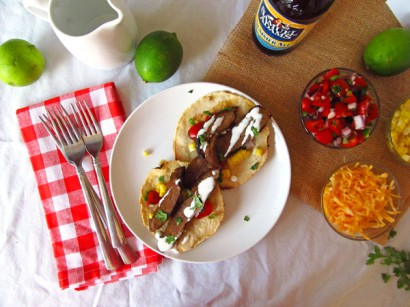

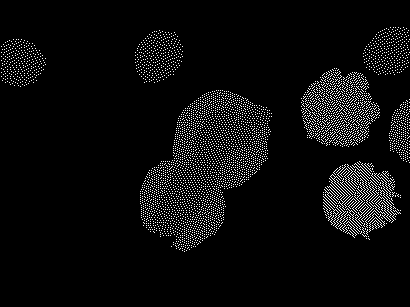

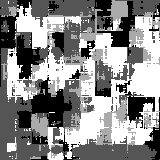

In [117]:
# Generate predictions for all images in the validation set

val_gen = OxfordPets(batch_size, img_size, val_input_img_paths, val_target_img_paths)
val_preds = model.predict(val_gen)

# val_preds = (val_preds > 0.5).astype(np.uint8)

def display_mask(i):
    """Quick utility to display a model's prediction."""
    mask = np.argmax(val_preds[i], axis=-1)
    mask = np.expand_dims(mask, axis=-1)
    img = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(mask))
    display(img)


# Display results for validation image #10
i = 2

# Display input image
display(Image(filename=val_input_img_paths[i]))

# Display ground-truth target mask
img = PIL.ImageOps.autocontrast(load_img(val_target_img_paths[i]))
display(img)

# Display mask predicted by our model
display_mask(i)  # Note that the model only sees inputs at 150x150.